In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

x_train = pd.read_csv('/kaggle/input/biocad/X_test.csv')
y_train = pd.read_csv('/kaggle/input/biocad/Y_train.csv')



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.impute import SimpleImputer

In [3]:
imputer = SimpleImputer()
imputed_x = pd.DataFrame(imputer.fit_transform(x_train))
imputed_x.columns = x_train.columns
x_train = imputed_x

x_train

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref)
0,85.8,60.0,100.0,90.0,0.0,44.521,43.850,0.0001,100.0,1.1,...,0.18237,15.122431,19.546421,1.61510,0.0,53.37324,0.0,1.0,10.0,10.0
1,86.0,60.0,100.0,90.0,0.0,46.436,43.820,0.0001,100.0,1.1,...,0.18246,15.122431,19.546421,1.61750,0.0,53.37324,0.0,1.0,10.0,10.0
2,86.2,60.0,100.0,90.0,0.0,49.890,41.402,0.0001,100.0,1.1,...,0.18252,15.122431,19.546421,1.61980,0.0,53.37324,0.0,1.0,10.0,10.0
3,86.4,60.0,100.0,90.0,0.0,53.790,39.519,0.0001,100.0,1.1,...,0.18257,15.122431,19.546421,1.62210,0.0,53.37324,0.0,1.0,10.0,10.0
4,86.6,60.0,100.0,90.0,0.0,56.957,36.338,0.0001,100.0,1.1,...,0.18262,15.122431,19.546421,1.62440,0.0,53.37324,0.0,1.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,36.2,55.0,100.0,47.0,0.0,26.007,118.800,0.0001,0.0,0.9,...,0.19040,15.122431,19.546421,0.75164,0.0,53.37324,0.0,1.0,12.0,12.0
1913,36.4,55.0,100.0,47.0,0.0,26.331,122.320,0.0001,0.0,0.9,...,0.19042,15.122431,19.546421,0.75520,0.0,53.37324,0.0,1.0,12.0,12.0
1914,36.6,55.0,100.0,47.0,0.0,28.435,124.470,0.0001,0.0,0.9,...,0.19047,15.122431,19.546421,0.75874,0.0,53.37324,0.0,1.0,12.0,12.0
1915,36.8,55.0,100.0,47.0,0.0,30.622,127.980,0.0001,0.0,0.9,...,0.19058,15.122431,19.546421,0.76227,0.0,53.37324,0.0,1.0,12.0,12.0


In [4]:
x_train['target']=y_train['pH(pH:pH)']

# Calculate specific growth rate
x_train['specific_growth_rate'] = np.log(x_train['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].shift(-1) / x_train['Offline Biomass concentratio(X_offline:X(g L^{-1}))']) / x_train['Time (h)']

# Calculate oxygen transfer rate
x_train['OTR'] = x_train['Aeration rate(Fg:L/h)'] * (x_train['Dissolved oxygen concentration(DO2:mg/L)'] - 0.5)

# Calculate carbon dioxide evolution rate
x_train['CER'] = x_train['Aeration rate(Fg:L/h)'] * x_train['carbon dioxide percent in off-gas(CO2outgas:%)'] * 44 / 1000

# Calculate respiratory quotient
x_train['RQ'] = x_train['Carbon evolution rate(CER:g/h)'] / x_train['OTR']

# Calculate power input
x_train['P/V'] = 0.003 * x_train['Agitator RPM(RPM:RPM)']**3 * (x_train['Vessel Weight(Wt:Kg)'] / x_train['Vessel Volume(V:L)'])

# Calculate metabolic heat rate
x_train['metabolic_heat_rate'] = 29.3 * x_train['specific_growth_rate'] * x_train['Offline Biomass concentratio(X_offline:X(g L^{-1}))']

# Calculate overall yield
x_train['overall_yield'] = x_train['Offline Penicillin concentration(P_offline:P(g L^{-1}))'] / x_train['Substrate concentration(S:g/L)']

x_train.head()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),target,specific_growth_rate,OTR,CER,RQ,P/V,metabolic_heat_rate,overall_yield
0,85.8,60.0,100.0,90.0,0.0,44.521,43.850,0.0001,100.0,1.1,...,10.0,10.0,6.4472,0.0,819.06,5.573304,0.001972,3257.561448,0.0,15283.364463
1,86.0,60.0,100.0,90.0,0.0,46.436,43.820,0.0001,100.0,1.1,...,10.0,10.0,6.4932,0.0,820.74,5.581488,0.001971,3257.799692,0.0,15743.840000
2,86.2,60.0,100.0,90.0,0.0,49.890,41.402,0.0001,100.0,1.1,...,10.0,10.0,6.5425,0.0,820.80,5.589672,0.001973,3258.034484,0.0,15804.059731
3,86.4,60.0,100.0,90.0,0.0,53.790,39.519,0.0001,100.0,1.1,...,10.0,10.0,6.5753,0.0,821.52,5.597592,0.001975,3258.269026,0.0,16065.473956
4,86.6,60.0,100.0,90.0,0.0,56.957,36.338,0.0001,100.0,1.1,...,10.0,10.0,6.5825,0.0,822.42,5.605248,0.001975,3258.500112,0.0,16420.825291


Oxygen Uptake Rate(OUR:(g min^{-1}))                      -0.081448
Base flow rate(Fb:L/h)                                    -0.063320
Air head pressure(pressure:bar)                           -0.061522
OTR                                                       -0.061228
Aeration rate(Fg:L/h)                                     -0.057719
PAA flow(Fpaa:PAA flow (L/h))                             -0.055356
Vessel Volume(V:L)                                        -0.054930
Vessel Weight(Wt:Kg)                                      -0.053611
Sugar feed rate(Fs:L/h)                                   -0.051722
CER                                                       -0.051057
Carbon evolution rate(CER:g/h)                            -0.051020
overall_yield                                             -0.042704
carbon dioxide percent in off-gas(CO2outgas:%)            -0.041331
RQ                                                        -0.035218
P/V                                             

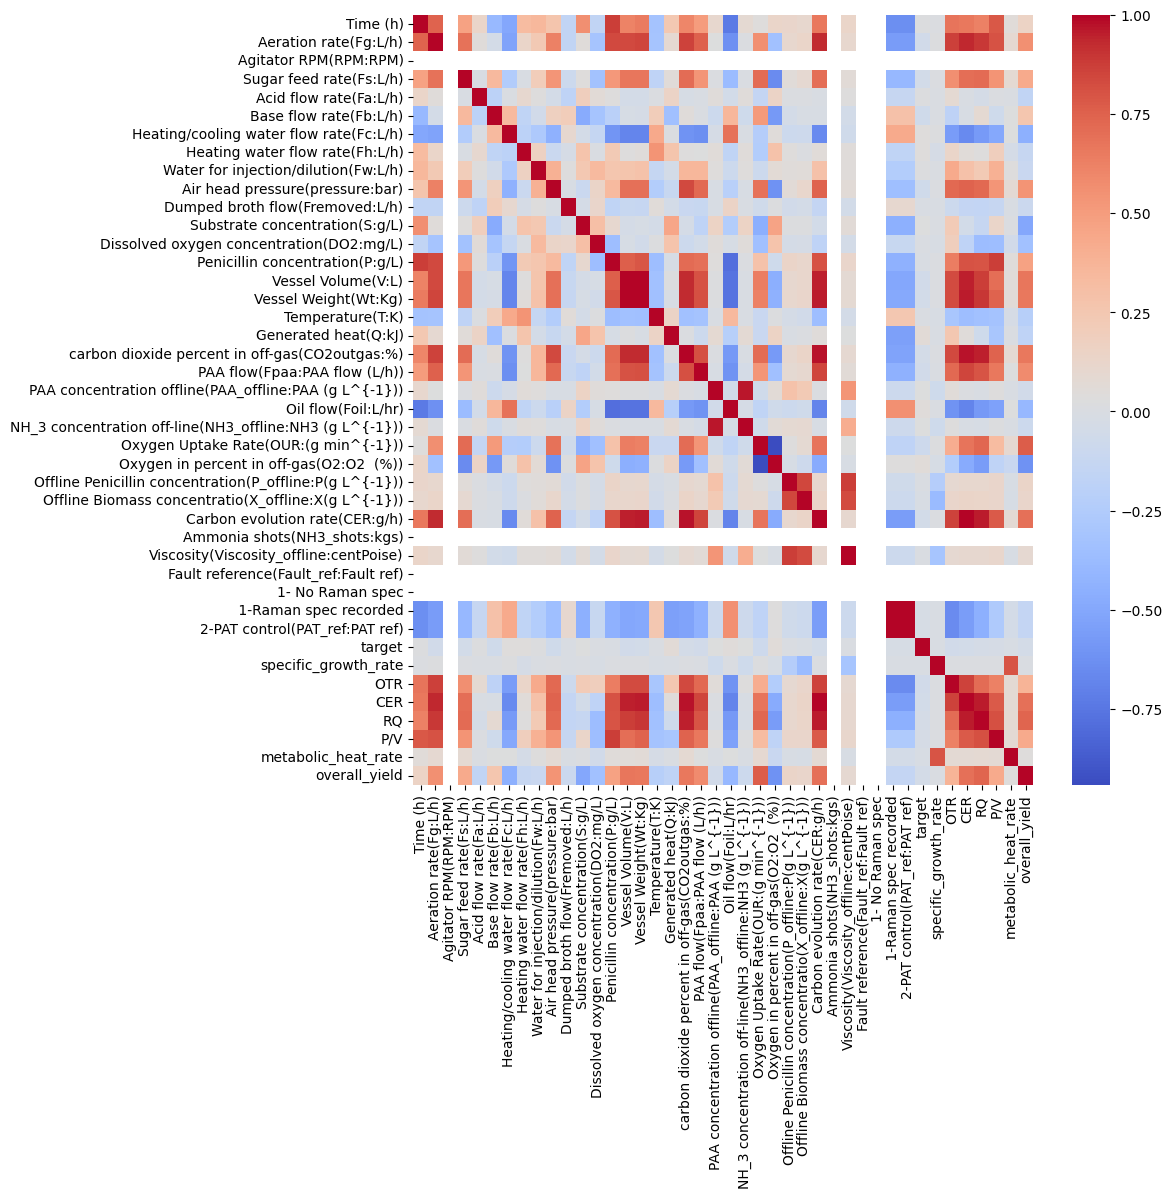

In [5]:
import matplotlib.pyplot as plt
corr_matrix = x_train.corr()
x_train.columns.values.tolist ()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')

tdf = corr_matrix['target'].sort_values(ascending=True)
tdf

In [6]:
print(tdf[abs(tdf) >= 0.04])
features = tdf[abs(tdf) > 0.04].index
features = features.drop('target')

Oxygen Uptake Rate(OUR:(g min^{-1}))             -0.081448
Base flow rate(Fb:L/h)                           -0.063320
Air head pressure(pressure:bar)                  -0.061522
OTR                                              -0.061228
Aeration rate(Fg:L/h)                            -0.057719
PAA flow(Fpaa:PAA flow (L/h))                    -0.055356
Vessel Volume(V:L)                               -0.054930
Vessel Weight(Wt:Kg)                             -0.053611
Sugar feed rate(Fs:L/h)                          -0.051722
CER                                              -0.051057
Carbon evolution rate(CER:g/h)                   -0.051020
overall_yield                                    -0.042704
carbon dioxide percent in off-gas(CO2outgas:%)   -0.041331
Heating/cooling water flow rate(Fc:L/h)           0.042382
Heating water flow rate(Fh:L/h)                   0.044637
Oil flow(Foil:L/hr)                               0.044837
Oxygen in percent in off-gas(O2:O2  (%))          0.0588

In [7]:
import shap
from catboost import CatBoostRegressor




In [8]:
X = x_train[features]
y = x_train.target
from sklearn.model_selection import train_test_split
# Creating train data and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=5)

In [9]:
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.metrics import mean_absolute_error

model = CatBoostRegressor(depth=2, learning_rate=1, l2_leaf_reg=5, iterations=7000, border_count=254, random_state=5)
model.fit(X_train, y_train)

explainer = shap.Explainer(model)
shap_values = explainer(X)
# score = model.score(X_train, y_train)  
    # print("Training score: ", score)
preds = model.predict(X_val)
    # print("Target: \n{} \n\nPredictions: {}".format(y_valid, preds))
#print("MAE: ", mean_absolute_error(y_val, preds))

0:	learn: 0.0206482	total: 56.3ms	remaining: 6m 34s
1:	learn: 0.0199877	total: 57.6ms	remaining: 3m 21s
2:	learn: 0.0196208	total: 58.1ms	remaining: 2m 15s
3:	learn: 0.0193826	total: 58.6ms	remaining: 1m 42s
4:	learn: 0.0192286	total: 59.1ms	remaining: 1m 22s
5:	learn: 0.0189625	total: 59.6ms	remaining: 1m 9s
6:	learn: 0.0186256	total: 60ms	remaining: 60s
7:	learn: 0.0184592	total: 60.4ms	remaining: 52.8s
8:	learn: 0.0182588	total: 60.9ms	remaining: 47.3s
9:	learn: 0.0181443	total: 61.4ms	remaining: 42.9s
10:	learn: 0.0180721	total: 61.8ms	remaining: 39.2s
11:	learn: 0.0177319	total: 62.2ms	remaining: 36.2s
12:	learn: 0.0176579	total: 62.6ms	remaining: 33.6s
13:	learn: 0.0174833	total: 63ms	remaining: 31.4s
14:	learn: 0.0174348	total: 63.4ms	remaining: 29.5s
15:	learn: 0.0173142	total: 63.9ms	remaining: 27.9s
16:	learn: 0.0172031	total: 64.3ms	remaining: 26.4s
17:	learn: 0.0171642	total: 64.7ms	remaining: 25.1s
18:	learn: 0.0170978	total: 65.1ms	remaining: 23.9s
19:	learn: 0.0170576	to

In [10]:
test_dataset = pd.read_csv('/kaggle/input/biocad/X_train.csv')
# Calculate specific growth rate
test_dataset['specific_growth_rate'] = np.log(test_dataset['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].shift(-1) / test_dataset['Offline Biomass concentratio(X_offline:X(g L^{-1}))']) / test_dataset['Time (h)']

# Calculate oxygen transfer rate
test_dataset['OTR'] = test_dataset['Aeration rate(Fg:L/h)'] * (test_dataset['Dissolved oxygen concentration(DO2:mg/L)'] - 0.5)

# Calculate carbon dioxide evolution rate
test_dataset['CER'] = test_dataset['Aeration rate(Fg:L/h)'] * test_dataset['carbon dioxide percent in off-gas(CO2outgas:%)'] * 44 / 1000

# Calculate respiratory quotient
test_dataset['RQ'] = test_dataset['Carbon evolution rate(CER:g/h)'] / test_dataset['OTR']

# Calculate power input
test_dataset['P/V'] = 0.003 * test_dataset['Agitator RPM(RPM:RPM)']**3 * (test_dataset['Vessel Weight(Wt:Kg)'] / test_dataset['Vessel Volume(V:L)'])

# Calculate metabolic heat rate
test_dataset['metabolic_heat_rate'] = 29.3 * test_dataset['specific_growth_rate'] * test_dataset['Offline Biomass concentratio(X_offline:X(g L^{-1}))']

# Calculate overall yield
test_dataset['overall_yield'] = test_dataset['Offline Penicillin concentration(P_offline:P(g L^{-1}))'] / test_dataset['Substrate concentration(S:g/L)']




In [11]:
def replace_anomalies(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    data = np.where(data < lower_bound, lower_bound, data)
    data = np.where(data > upper_bound, upper_bound, data)
    return data
#test_dataset=pd.DataFrame(data=replace_anomalies(test_dataset[features]), columns=features)

In [12]:
features_to_test = features
predictions = model.predict(test_dataset[features_to_test])


In [13]:
predictions_df = pd.DataFrame(data=predictions,columns=['pH(pH:pH)'])
# predictions_df = abs(predictions_df.groupby('reco_id_curr').mean().reset_index())
predictions_df.to_csv("answer.csv", index=False)
predictions_df

,pH(pH:pH)
0,6.525756
1,6.530713
2,6.550172
3,6.543252
4,6.538126
...,...
10858,6.497299
10859,6.511043
10860,6.491345
10861,6.460156
